# Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import dataset

In [5]:
df = pd.read_csv('chars_combined.csv')
df

,cover_average-length,cover_brief,cover_concise,cover_extensive,cover_long,cover_medium-length,cover_moderate-length,cover_short,cover_verbose,email_average-length,...,explanation_verbose,social_average-length,social_brief,social_concise,social_extensive,social_long,social_medium-length,social_moderate-length,social_short,social_verbose
0,1297,1282,768,1772,2301,1591,1746,954,1795,1390,...,1938,720,519,388,1534,1382,1000,974,551,1191
1,1403,1131,741,1911,2076,1822,1280,1091,1998,1166,...,1452,828,464,465,1246,1283,877,901,499,1506
2,1164,1041,957,2197,2061,1495,1557,761,1641,1304,...,1529,737,664,383,1429,1218,894,831,459,1411
3,1382,960,837,1721,1713,1465,1342,968,2038,1019,...,2024,835,555,430,1364,1184,1068,1025,476,1355
4,1302,1457,921,1666,1925,1755,1340,975,2179,1057,...,2043,716,491,448,1329,1177,1102,998,529,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1349,1036,1174,1996,1833,1496,1468,995,1698,1032,...,1764,611,609,426,1429,1110,845,935,541,1290
96,1356,1102,792,1807,1943,1482,1340,945,1743,1448,...,2022,732,459,634,1255,1249,803,1069,478,1417
97,1204,1193,914,1501,1799,1474,1672,1019,1996,1318,...,2302,877,374,464,1059,1461,863,1014,550,1636
98,1108,1106,1048,1423,2035,1459,1319,1113,1526,1484,...,1234,714,561,497,1137,1486,862,885,546,1570


In [6]:
print('SHAPE:\n', df.shape, '\n')
print('COLUMNS:\n', list(df.columns))

SHAPE:
 (100, 45) 

COLUMNS:
 ['cover_average-length', 'cover_brief', 'cover_concise', 'cover_extensive', 'cover_long', 'cover_medium-length', 'cover_moderate-length', 'cover_short', 'cover_verbose', 'email_average-length', 'email_brief', 'email_concise', 'email_extensive', 'email_long', 'email_medium-length', 'email_moderate-length', 'email_short', 'email_verbose', 'essay_average-length', 'essay_brief', 'essay_concise', 'essay_extensive', 'essay_long', 'essay_medium-length', 'essay_moderate-length', 'essay_short', 'essay_verbose', 'explanation_average-length', 'explanation_brief', 'explanation_concise', 'explanation_extensive', 'explanation_long', 'explanation_medium-length', 'explanation_moderate-length', 'explanation_short', 'explanation_verbose', 'social_average-length', 'social_brief', 'social_concise', 'social_extensive', 'social_long', 'social_medium-length', 'social_moderate-length', 'social_short', 'social_verbose']


# Coefficient of variation

In [7]:
# coefficient of variation (CV) = standard deviation / mean
# higher values of CV indicate higher variation in the data
# expresses the relative variability or dispersion of a data set, relative to its mean
cv = df.std() / df.mean()
cv = cv.sort_values(ascending=False)
cv

explanation_short              0.282799
explanation_verbose            0.225495
explanation_extensive          0.222661
explanation_concise            0.220978
explanation_moderate-length    0.206409
explanation_brief              0.204752
explanation_long               0.196304
email_brief                    0.190252
explanation_medium-length      0.189586
social_short                   0.184797
explanation_average-length     0.183535
social_brief                   0.182113
email_short                    0.180295
email_concise                  0.172341
email_medium-length            0.171284
social_average-length          0.170975
email_moderate-length          0.166700
email_average-length           0.157619
cover_concise                  0.157112
email_extensive                0.153808
social_verbose                 0.152630
social_concise                 0.151570
social_extensive               0.147611
cover_medium-length            0.143866
social_medium-length           0.140089


### Mean of CV per length descriptor used

In [9]:
colnames = list(df.columns)
# split colnames on _ and take the second element, create a list of these
length_descriptors = [col.split('_')[1] for col in colnames]
# create a set of these
length_descriptors = set(length_descriptors)
length_descriptors = list(length_descriptors)
print('LENGTH DESCRIPTORS:\n', length_descriptors)

LENGTH DESCRIPTORS:
 ['brief', 'concise', 'extensive', 'verbose', 'average-length', 'long', 'short', 'medium-length', 'moderate-length']


In [11]:
def mean_for_descriptor(descriptor):
    cv_descriptor = cv[cv.index.str.contains(descriptor)]
    return cv_descriptor.mean()

# for loop to create a dataframe called 'cv_means' which stores the mean CV for each length descriptor
for descriptor in length_descriptors:
    cv_means = pd.DataFrame({'mean_cv': [mean_for_descriptor(descriptor) for descriptor in length_descriptors]}, index=length_descriptors)

cv_means.sort_values(by='mean_cv', ascending=False)

,mean_cv
short,0.182163
brief,0.164801
concise,0.160581
extensive,0.153767
medium-length,0.152350
verbose,0.150312
average-length,0.150112
moderate-length,0.147322
long,0.137638


<Axes: >

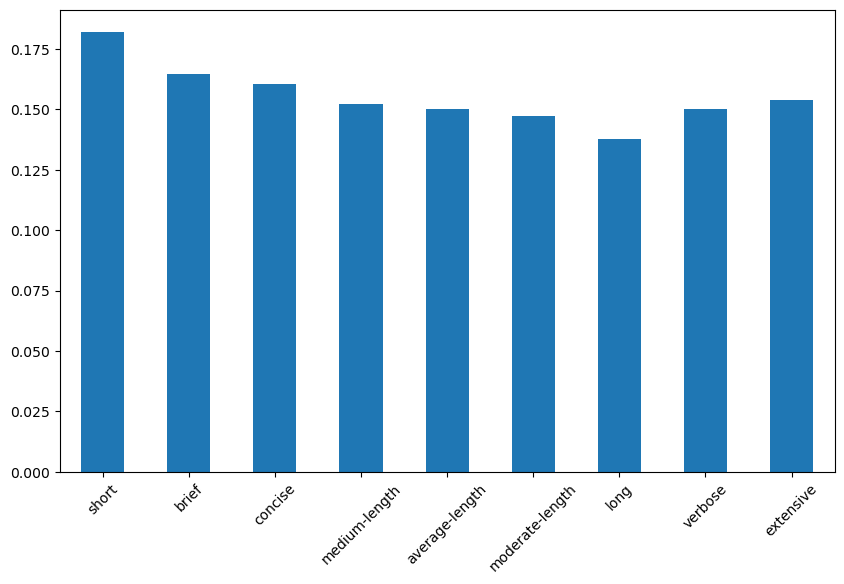

In [158]:
cv_means.plot(kind='bar', figsize=(10, 6), rot=45, legend=False)
# cv_means.plot(kind='barh', figsize=(10, 6), legend=False)
# cv_means.plot.bar(colors=['blue', 'blue', 'blue', 'yellow', 'yellow', 'yellow', 'red', 'red', 'red'])

In [146]:
# # do the same graph as before but colour the bars blue if the column name contains 'short' and red if it contains 'long'
# cv_means.plot(kind='bar', figsize=(10, 6), rot=45, legend=False, color=['blue' if 'short' in x else 'red' for x in cv_means.index])

### Without annotation

<Axes: title={'center': 'Highest and lowest Coefficient of Variation (CV)'}>

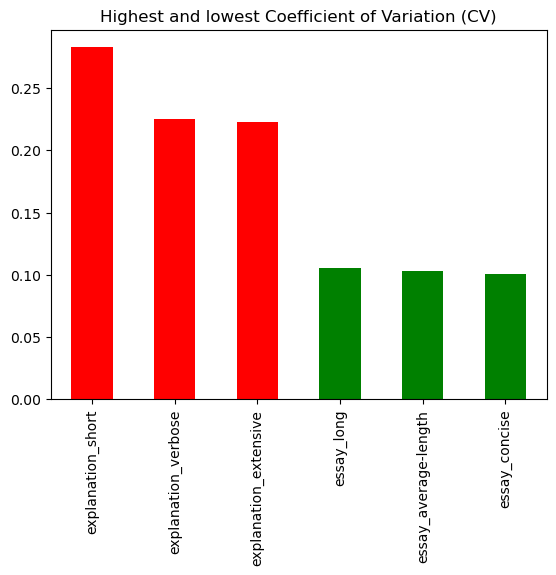

In [111]:
# on the 'Highest and lowest Coefficient of Variation (CV)' graph colour the 3 lowest values green and the 3 highest values red
cv.head(3).append(cv.tail(3)).plot.bar(title = 'Highest and lowest Coefficient of Variation (CV)', color=['red', 'red', 'red', 'green', 'green', 'green'])

### With annotation

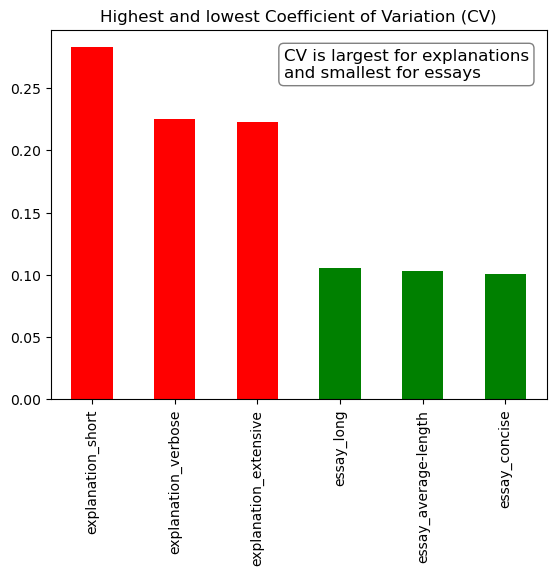

In [120]:
# Generate the plot
ax = cv.head(3).append(cv.tail(3)).plot.bar(title='Highest and lowest Coefficient of Variation (CV)', color=['red', 'red', 'red', 'green', 'green', 'green'])

# Add the annotation
ax.annotate('CV is largest for explanations\nand smallest for essays', xy=(0, 0), xytext=(0.47, 0.95),
             xycoords='axes fraction', textcoords='axes fraction',
             fontsize=12, ha='left', va='top',
             bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray'))

# Show the plot
plt.show()

### Distributions of samples with highest and lowest CV

##### Highest

<Axes: >

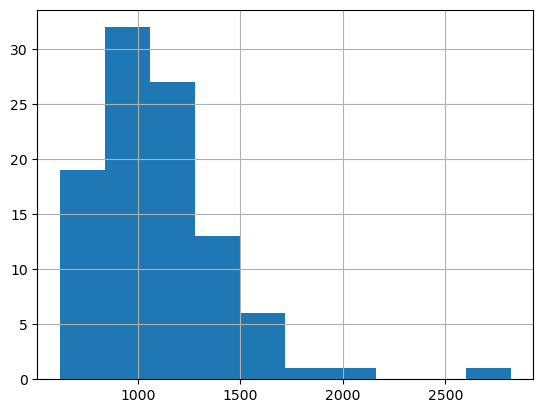

In [43]:
# explanation_short has the highest CV, high variation in the data
# distribution is skewed to the right
df['explanation_short'].hist()

##### Lowest

<Axes: >

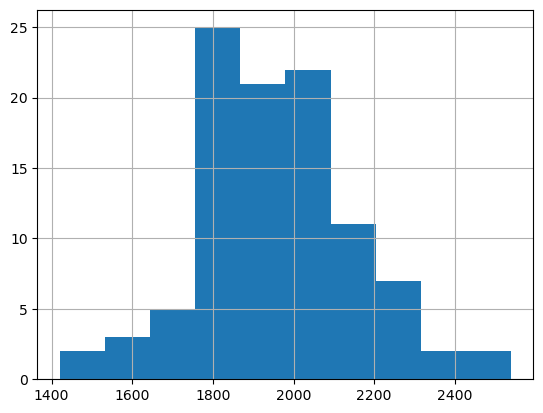

In [44]:
# essay_concise has the lowest CV, low variation in the data
# most of the values are around the mean
df['essay_concise'].hist()

# Difference in average response lengths between templates

NOTE: 
- How to group 3 bars into one "group of bars"
- Calculate the mean of length descriptor groups for the simple barchart

### Short descriptor group

<Axes: title={'center': 'Median number of characters in short templates'}>

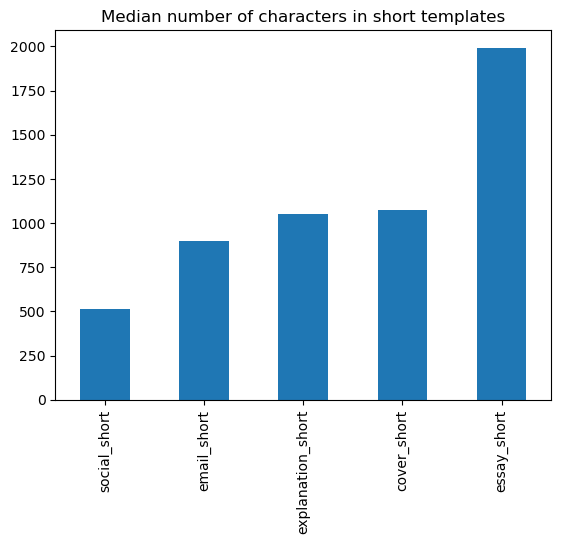

In [30]:
df_short = df[[col for col in df.columns if 'short' in col]]
df_short.median().sort_values().plot.bar(title='Median number of characters in short templates')

<Axes: title={'center': 'Median number of characters using short descriptor grouped by template type'}>

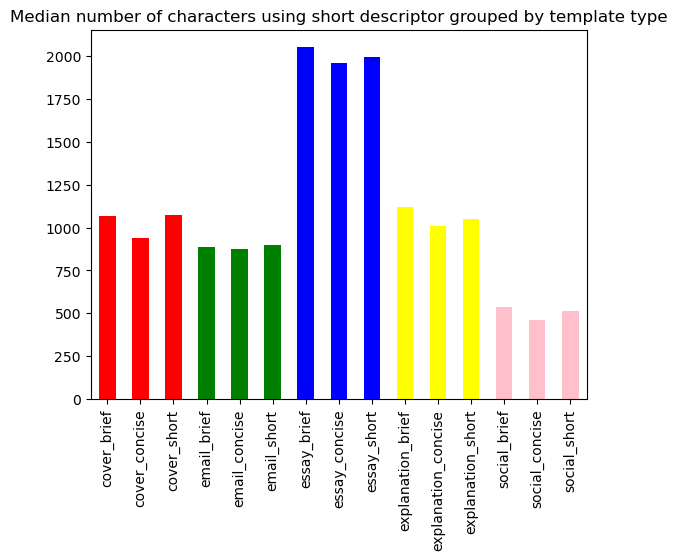

In [133]:
df_all_short = df[[col for col in df.columns if 'short' in col or 'brief' in col or 'concise' in col]]
df_all_short.median().plot.bar(title='Median number of characters using short descriptor grouped by template type', color=['red', 'red', 'red', 'green', 'green', 'green', 'blue', 'blue', 'blue', 'yellow', 'yellow', 'yellow', 'pink', 'pink', 'pink'])

### Average descriptor group

<Axes: title={'center': 'Median number of characters in average templates'}>

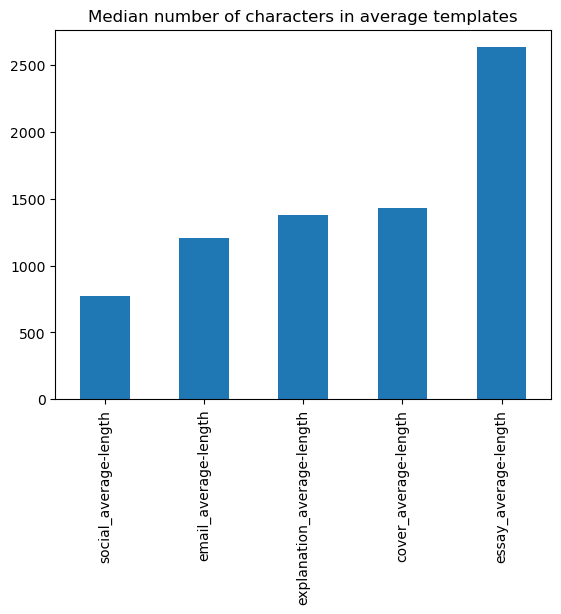

In [31]:
df_average = df[[col for col in df.columns if 'average' in col]]
df_average.median().sort_values().plot.bar(title='Median number of characters in average templates')

<Axes: title={'center': 'Median number of characters using average descriptor grouped by template type'}>

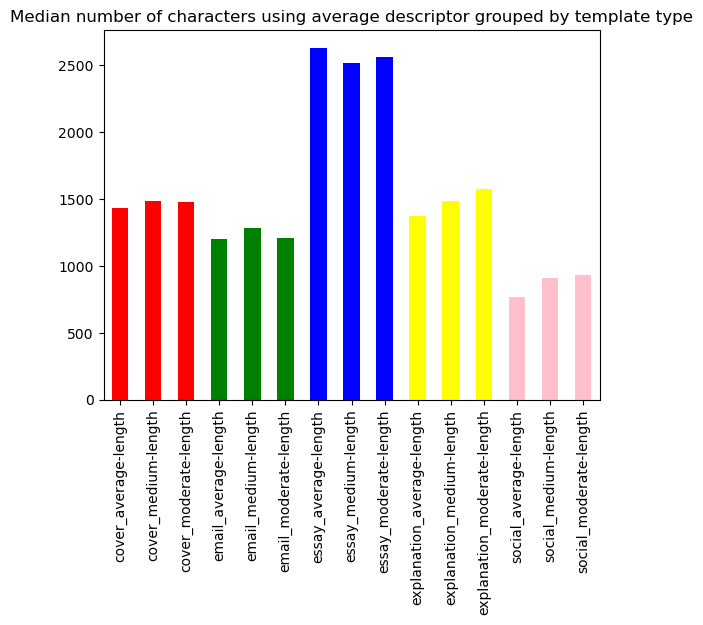

In [134]:
df_all_medium = df[[col for col in df.columns if 'average' in col or 'medium' in col or 'moderate' in col]]
df_all_medium.median().plot.bar(title='Median number of characters using average descriptor grouped by template type', color=['red', 'red', 'red', 'green', 'green', 'green', 'blue', 'blue', 'blue', 'yellow', 'yellow', 'yellow', 'pink', 'pink', 'pink'])

### Long descriptor group

<Axes: title={'center': 'Median number of characters in long templates'}>

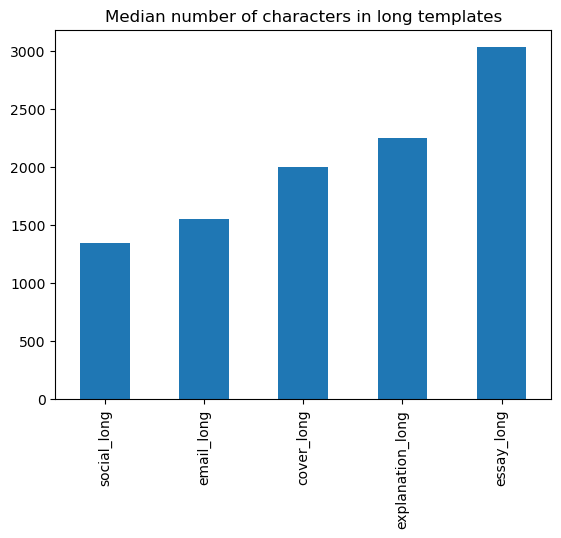

In [136]:
df_long = df[[col for col in df.columns if 'long' in col]]
df_long.median().sort_values().plot.bar(title='Median number of characters in long templates')

<Axes: title={'center': 'Median number of characters using long descriptor grouped by template type'}>

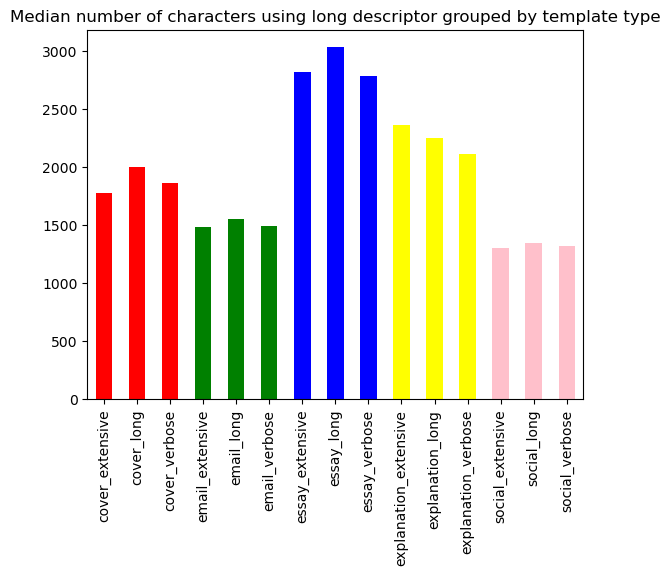

In [137]:
df_all_long = df[[col for col in df.columns if 'long' in col or 'verbose' in col or 'extensive' in col]]
df_all_long.median().plot.bar(title='Median number of characters using long descriptor grouped by template type', color=['red', 'red', 'red', 'green', 'green', 'green', 'blue', 'blue', 'blue', 'yellow', 'yellow', 'yellow', 'pink', 'pink', 'pink'])

# Average lengths per descriptor grouped by template

NOTE: Maybe Cleveland dot plots would be better to compare "bar" lengths between medians

### Reusable function to calculate such graph

In [78]:
import matplotlib.pyplot as plt

def plot_group_median(df, group_name):
    # Step 0: Extract the columns containing templates for the specified group
    group_cols = [col for col in df.columns if group_name in col]
    df_group = df[group_cols]

    # Step 1: Compute the median values
    median_values = df_group.median()

    # Step 2: Create a dictionary mapping column names to median values
    median_dict = {col: median_values[col] for col in df_group.columns}

    # Step 3: Sort the dictionary while maintaining color order
    sorted_dict = dict(sorted(median_dict.items(), key=lambda x: (
        0 if 'short' in x[0] or 'brief' in x[0] or 'concise' in x[0] else
        1 if 'medium-length' in x[0] or 'average-length' in x[0] or 'moderate-length' in x[0] else 2)))

    # Step 4: Extract sorted column names and median values
    sorted_cols = list(sorted_dict.keys())
    sorted_medians = list(sorted_dict.values())

    # Step 5: Plot the sorted values with specified colors
    color_scheme = ['blue' if 'short' in col or 'brief' in col or 'concise' in col else
                    'yellow' if 'medium-length' in col or 'average-length' in col or 'moderate-length' in col else 'red'
                    for col in sorted_cols]

    plt.bar(sorted_cols, sorted_medians, color=color_scheme)
    plt.title('Median number of characters in {} templates'.format(group_name))

    # Rotate the x-axis labels vertically
    plt.xticks(rotation='vertical')

    plt.show()

### Email

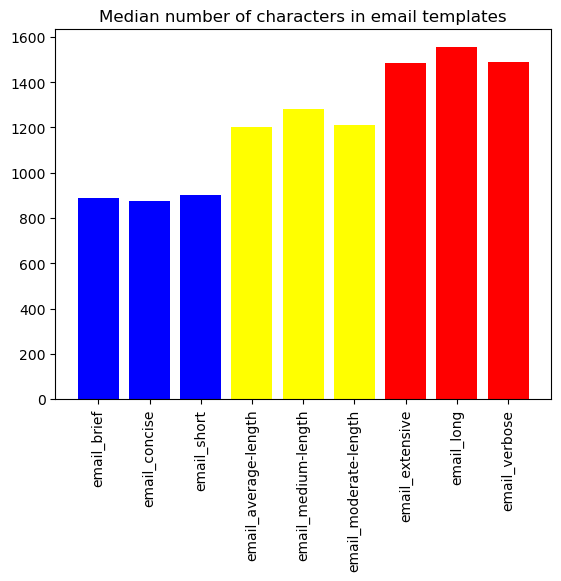

In [79]:
plot_group_median(df, 'email')

### Social media post

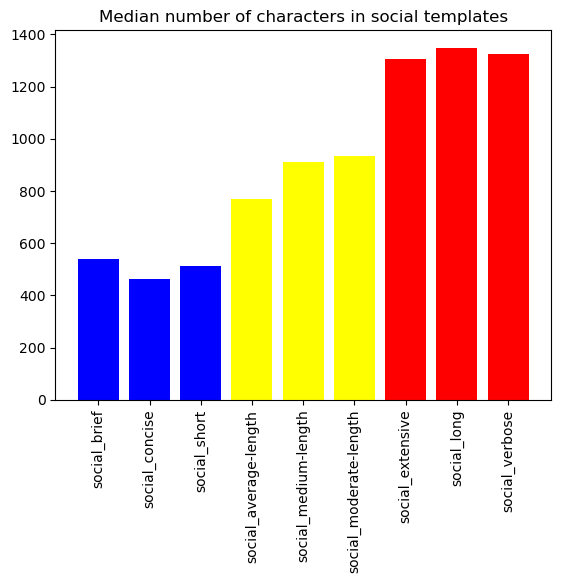

In [80]:
plot_group_median(df, 'social')

### Cover letter

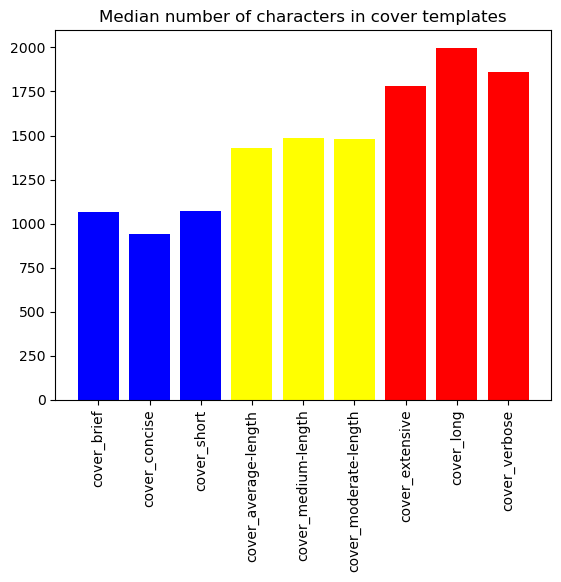

In [81]:
plot_group_median(df, 'cover')

### Essay

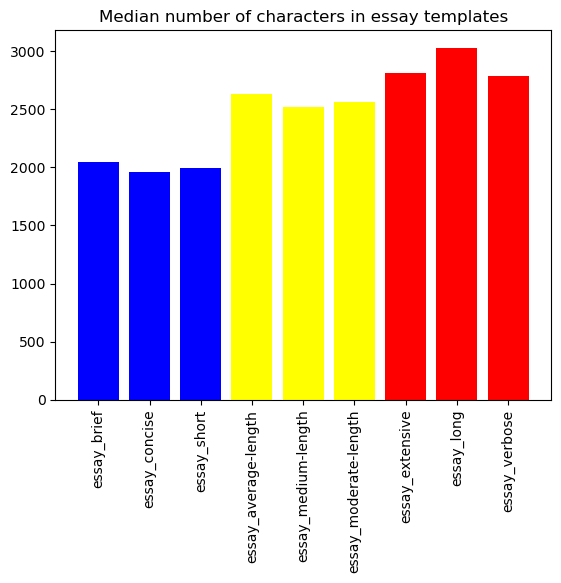

In [82]:
plot_group_median(df, 'essay')

### Explanation

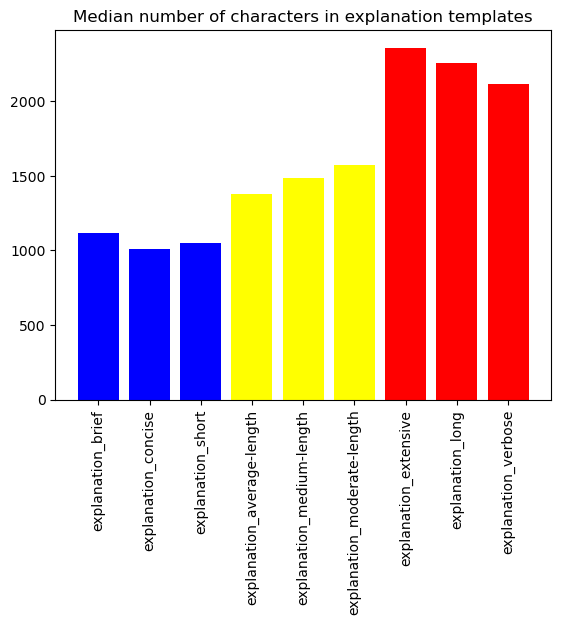

In [83]:
plot_group_median(df, 'explanation')

### All barcharts in separate windows within the same figure

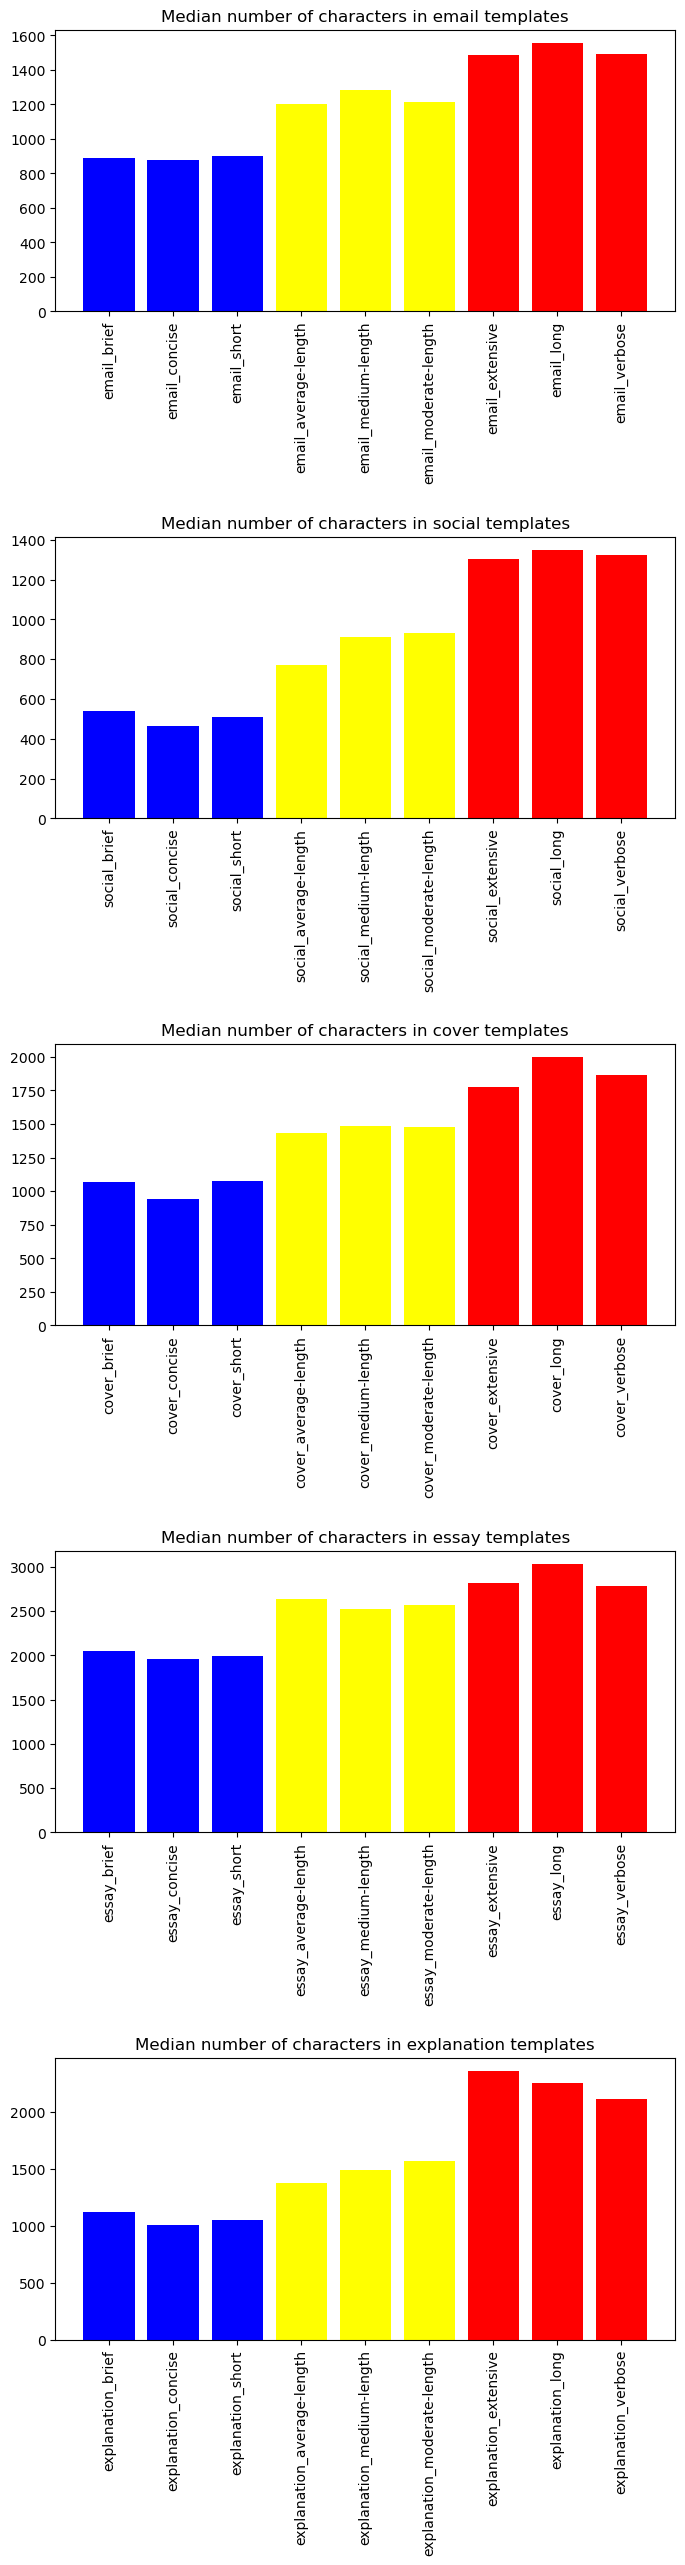

In [98]:
import warnings
warnings.filterwarnings("ignore")

# Create a figure with 5 subplots
fig, axs = plt.subplots(5, 1, figsize=(8, 30))

# Call the function for each group and assign it to a subplot
plot_group_median(df, 'email', axs[0])
plot_group_median(df, 'social', axs[1])
plot_group_median(df, 'cover', axs[2])
plot_group_median(df, 'essay', axs[3])
plot_group_median(df, 'explanation', axs[4])

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.8)

# Show the figure
plt.show()


# Medians for all columns

<Axes: >

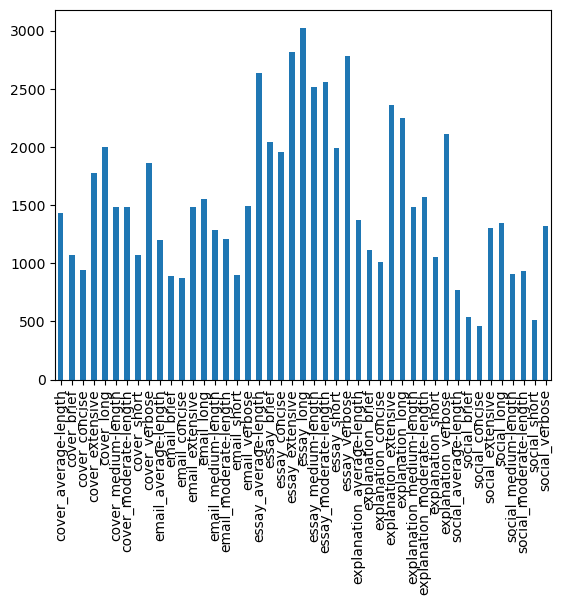

In [6]:
df.median().plot.bar()

### Coloured

<Axes: >

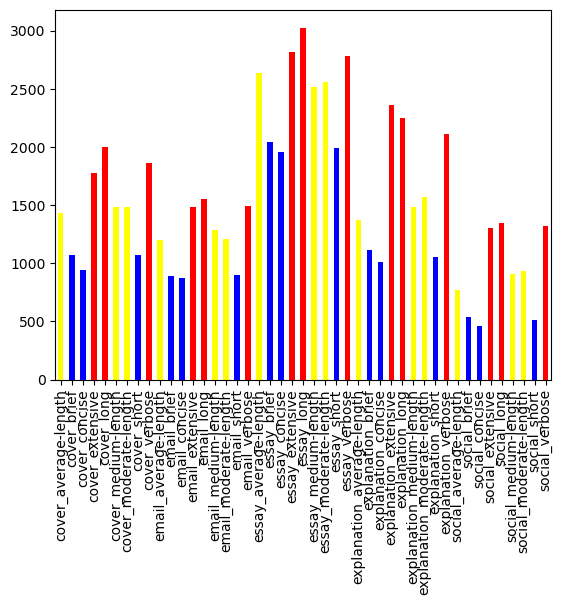

In [51]:
# change the color of bars to red for columns that contain 'short', 'brief' or 'concise' AND yellow for columns that contain 'medium-length', 'average-length' or 'moderate-length'
df.median().plot.bar(
    color=['blue' if 'short' in col or 'brief' in col or 'concise' in col else 'yellow' if 'medium-length' in col or 'average-length' in col or 'moderate-length' in col else 'red' for col in df.columns])